**CIFAR-10**

**Tarefa de classificação de 10 classes**

*   avião
*   automóvel
*   pássaro
*   gato
*   veado
*   cachorro
*   sapo
*   cavalo
*   navio
*   caminhão





**Importações iniciais**

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

**Leitura da base de dados**

In [0]:
from keras.datasets import cifar10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Usando a função *Shape()* para verificar a forma dos conjuntos de dados**

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

**Visualização dos dados**

*   X_train na posição 2, como exemplo de amostra



Text(0.5, 1.0, 'Classe[9]')

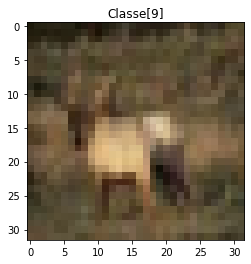

In [50]:
plt.imshow(X_train[3], cmap='gray')
plt.title('Classe' + str(y_train[2]))

**Conversão dos dados para o TensorFlow realizar a leitura**


*   Função ***reshape()***, para remodelar a forma dos dados


In [0]:
features_train = X_train.reshape(X_train.shape[0], 32, 32, 3)

In [0]:
features_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [0]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

**Modificar a escala dos dados**

*   escala de 0 a 1


In [0]:
features_train /= 255

In [0]:
features_test /= 255

**Variáveis do tipo Dummy**

In [0]:
class_train = np_utils.to_categorical(y_train, 10)

In [57]:
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
class_test = np_utils.to_categorical(y_test, 10)

**Estrutura da CNN**

In [61]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3),
                         input_shape = (32,32,3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3),
                         input_shape = (32,32,3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10,
                        activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(features_train, class_train,
                  batch_size = 128, epochs = 5,
                  validation_data = (features_test, class_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 71s 1ms/step - loss: 1.6069 - accuracy: 0.4277 - val_loss: 1.9459 - val_accuracy: 0.3265
Epoch 2/5
50000/50000 [==============================] - 74s 1ms/step - loss: 1.2605 - accuracy: 0.5606 - val_loss: 1.4963 - val_accuracy: 0.5107
Epoch 3/5
50000/50000 [==============================] - 75s 2ms/step - loss: 1.1056 - accuracy: 0.6141 - val_loss: 1.0708 - val_accuracy: 0.6348
Epoch 4/5
50000/50000 [==============================] - 80s 2ms/step - loss: 1.0133 - accuracy: 0.6456 - val_loss: 1.5881 - val_accuracy: 0.4800
Epoch 5/5
50000/50000 [==============================] - 81s 2ms/step - loss: 0.9391 - accuracy: 0.6703 - val_loss: 0.9622 - val_accuracy: 0.6637


In [62]:
resultados = classificador.evaluate(features_test, class_test)

10000/10000 [==============================] - 5s 496us/step


In [0]:
media = sum(resultados) / len(resultados)

In [67]:
media

0.8129450943946839